In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

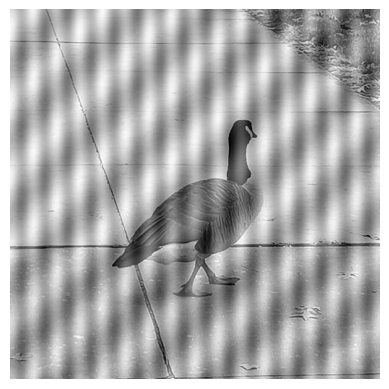

In [10]:
image = cv2.imread('duck.jpeg', cv2.IMREAD_GRAYSCALE)

# show
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

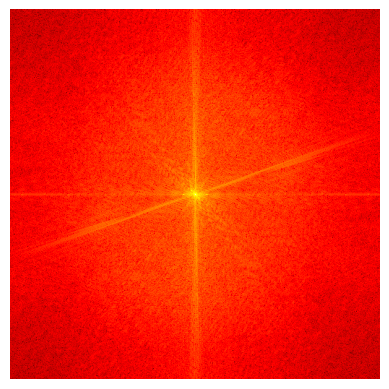

In [21]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

/tmp/ipykernel_38985/1244599967.py:8: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


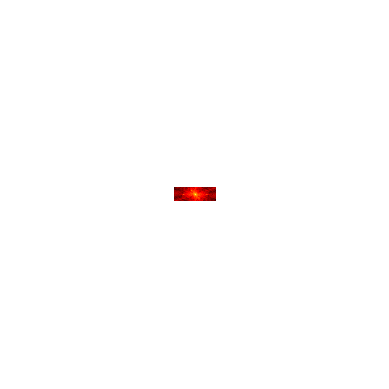

In [19]:
# the noise is in the strgiht line in the middle of the magnitude spectrum image
# we can remove it by applying a mask to the image
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-10:crow+10, ccol-30:ccol+30] = 1
fshift = fshift*mask
magnitude_spectrum = 20*np.log(np.abs(fshift))

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()


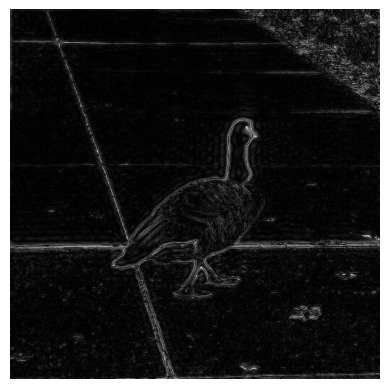

In [8]:
# remove noise
rows, cols = image.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


# show
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()

